# Day 3:30 daily statistics

No desafio de hoje aplicarei o **teste de falta de ajuste** e o **Erro Puro** em um modelo de **regressão linear simples**. Para isso irei considerar duas variáveis, uma relacionada a massa muscular de uma pessoa e a idade para 26 indivíduos. Os dados são apresentados na tabela abaixo: 


| Massa | 100 | 95 | 116 | 97 | 100 | 95 | 105 | 100 | 105 | 97 | 87 | 80 | 76 | 91 | 84 | 90 | 80 | 68 | 78 | 82 | 76 | 84 |  3 | 65 | 68 | 77 |
|:-----:|:---:|:--:|:---:|:--:|:---:|:--:|:---:|:---:|:---:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| Idade |  43 | 43 |  45 | 45 |  45 | 16 |  49 |  53 |  53 | 53 | 56 | 56 | 58 | 64 | 65 | 65 | 65 | 67 | 68 | 71 | 71 | 71 | 73 | 76 | 76 | 78 |

O nosso objetivo é determinar um modelo de previsão para a variável Massa Muscular (Y) considerando como  variável independente a Idade.

$\color{red}{\text{Passo 1}}$ - Neste passo iremos criar as variáveis de entrada Massa Muscular e Idade. 

In [1]:
#Criação da base de dados
massa=c(100,95,116,97,100,95,105,100,105,97,87,80,76,91,84,90,80,68,78,82,76,84,73,65,68,77)
idade=c(43,43,45,45,45,46,49,53,53,53,56,56,58,64,65,65,65,67,68,71,71,71,73,76,76,78)


$\color{red}{\text{Passo 2}}$ - Nesta etapa construiremos o diagrama de dispersão entre as variáveis em estudo. O objetivo é determinar se existe relação entre as variáveis objeto de estudo.

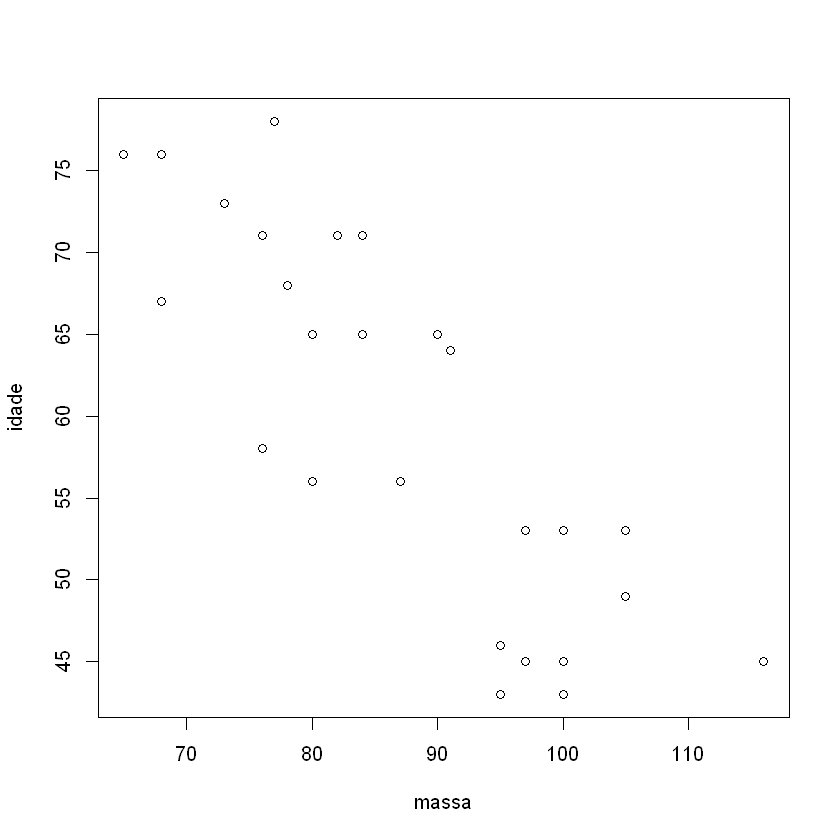

In [2]:
#cosntruindo o diagrama de dispersão 
plot(massa,idade)

Os dados nos sugerem que quanto ***maior*** for a massa ***menor*** será a idade associada.

$\color{red}{\text{Passo 3}}$ - Com uma possível relação entre massa e idade, o próximo passo é a determinação do modelo de previsão linear, usando o comando $lm$, portanto, temos:

In [3]:
#Criação do modelo de previsão linear
reg <- lm(massa~idade)
reg


Call:
lm(formula = massa ~ idade)

Coefficients:
(Intercept)        idade  
   143.6514      -0.9427  


O modelo estimado é apresentado pela seguinte equação: $\hat{Y}=143,6514-0,9427\cdot idade_i$

Usando o comando $summary()$ é possível determinar se o modelo encontrado poderá ser considerado significativo.

In [4]:
#Determinação do R^2 e determinação da significância dos coeficientes do modelo estimado
summary(reg)


Call:
lm(formula = massa ~ idade)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.973  -4.173  -1.387   6.739  14.771 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 143.6514     7.9441  18.083 1.74e-15 ***
idade        -0.9427     0.1305  -7.223 1.83e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.525 on 24 degrees of freedom
Multiple R-squared:  0.6849,	Adjusted R-squared:  0.6718 
F-statistic: 52.17 on 1 and 24 DF,  p-value: 1.832e-07


O modelo estimado possui parâmetros $\beta_0$ e $\beta_1$ significativos ao nível de 5% de significância além de apresentar um coeficiente de determinação $R^2=0,6849$, indicando que o modelo estimado explica cerca de 68,49% a variação que é inerente ao processo.

$\color{red}{\text{Passo 4}}$ - Apresentação do gráfico de dispersão com a reta estimada 

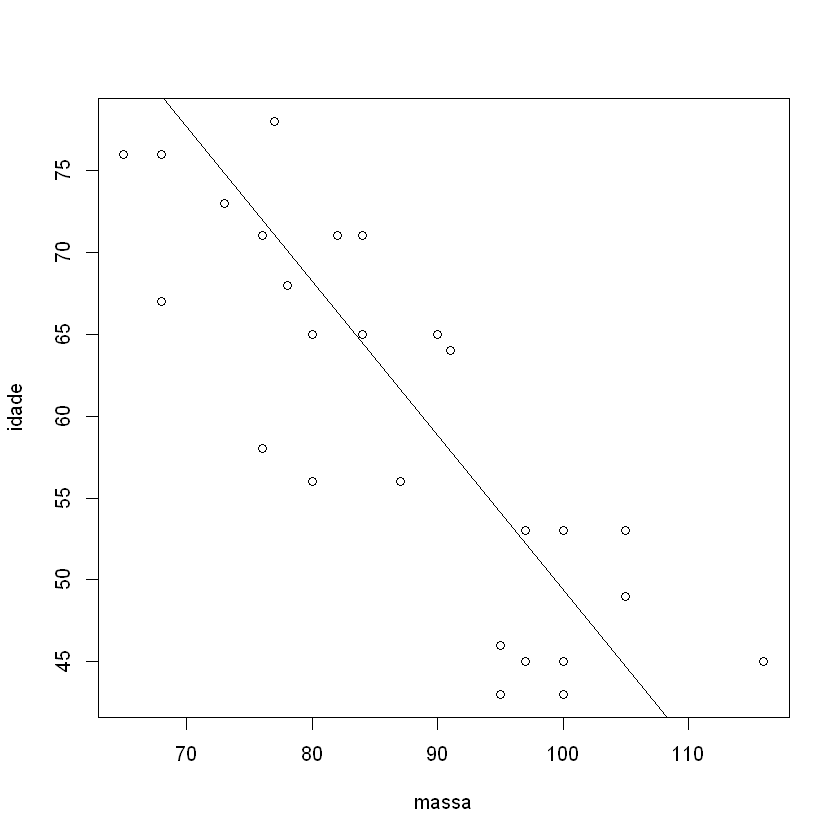

In [5]:
#Gráfico estimado
plot(massa,idade)
abline(lm(massa~idade))

O gráfico acima apresenta valores diferentes de Y para valores fixos de X, desta forma é coerente a determinação do ***coeficiente de determinação real***, além das medidas de ***erro puro*** e ***falta de ajuste***. 

Para determinar o (erro puro) e a (falta de ajuste) dentro da tabela da ANOVA basta declarar a variável preditora como se fosse um ***factor***, como será visto no código abaixo.

In [6]:
erro_puro <- lm(massa~factor(idade))
anova(reg,erro_puro)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
24,1358.9419,NA,NA,NA,NA
11,368.1667,13,990.7752,2.277089,0.0898696


Dos resultados encontrados na tabela acima temos: ***Soma dos quadrados dos resíduos = 1358.9419***, ***Soma dos Quadrados do Erro Puro = 368.1667*** e a ***Soma de Quadrados da Falta de Ajuste = 990.7752***, com 24, 11 e 13 graus de liberdade respectivamente. 

Portanto o coeficiente de determinação Real será a razão entre o coeficiente de determinação encontrado no primeiro modelo (R^2 = 0.6849) e o coeficiente de determinação máximo, que será obtido no ajuste da categorização da variável idade, para isso temos: 

In [7]:
#determinação do coeficiente de determinação para a categorização da variável idade

erro_puro_s=summary(erro_puro)
erro_puro_s$r.squared


[1] 0.9146402

Portanto o coeficiente de determinação real é dado por: $R^2_{real}=R^2/R^2_{max}=\frac{0,6849}{0,9146401}=0,7488$. Portanto 74,88% da variabilidade total dos dados podem ser explicado pelo modelo de regressão, esse valor da uma ideia melhor do que foi alcançado pelo modelo dentro do que era possível.

O cálculo do $R^2_{real}$ é devido as seguintes circunstâncias observadas:

+ i) Observou-se em X valores repetidos;
+ ii) Observou-se no gráfico do modelo ajustado pontos que estavam fora da reta ajustada, tal situação é devido a falta de ajuste no modelo estimado ou existe uma variação aleatória em torno da reta conhecido como erro puro.

Portanto o teste para a falta de ajuste é dado a seguir, levando-se em consideração a seguinte hipótese:

\begin{array}{ll}
         H_0: \mbox{O modelo linear é adequado};\\
        H_1: \mbox{O modelo linear não é adequado}\end{array}
        
Logo a estatística encontrada para o teste F foi de 2.277089 com um p-valor de 0.0898696 nos indicando que a hipótese nula não poderá ser rejeitada ao nível de 5\% de significância, ou seja, o modelo poderá ser considerado adequado.

$\color{red}{\text{Passo 5}}$ - Até o momento o modelo foi considerado adequado, no entanto não fizemos uma análise nos resíduos. Tais resíduos do modelo devem ser $IID(0;\sigma^2)$, independentes e identicamente distribuídos para serem considerados válidos para realizarem inferência. 

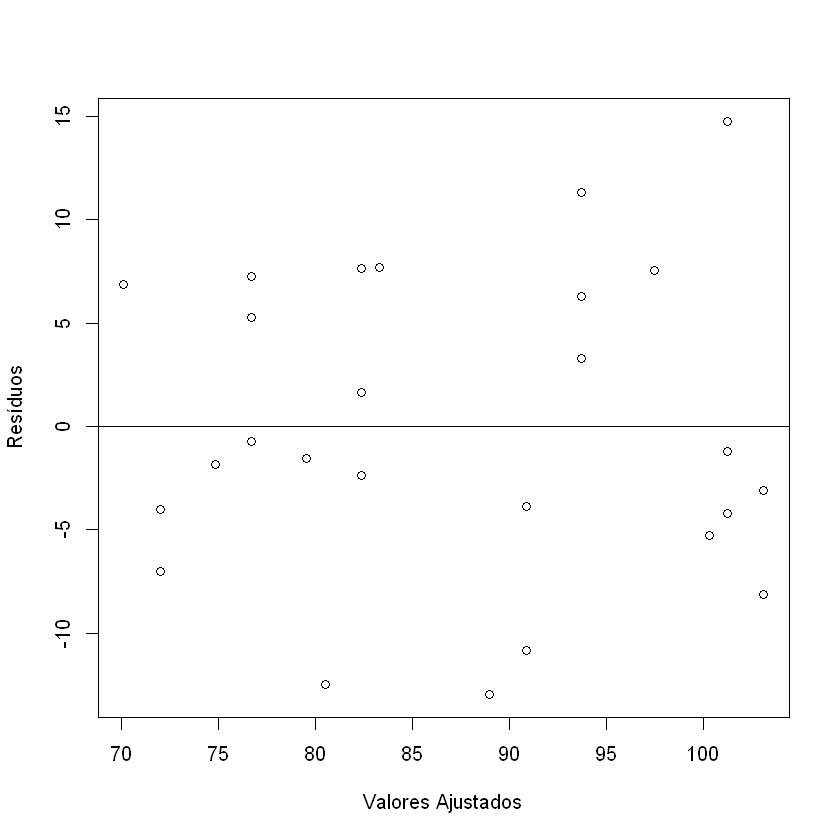

In [8]:
#Gráfico dos resíduso versus valores ajustados
plot(fitted(reg),residuals(reg),xlab="Valores Ajustados",ylab="Resíduos")
abline(h=0)

O gráfico dos valores ajustados versus resíduos não apresenta suposição de homocedasticidade. O próximo gráfico irá traçar o comportamento dos resíduos versus a variável explicativa.

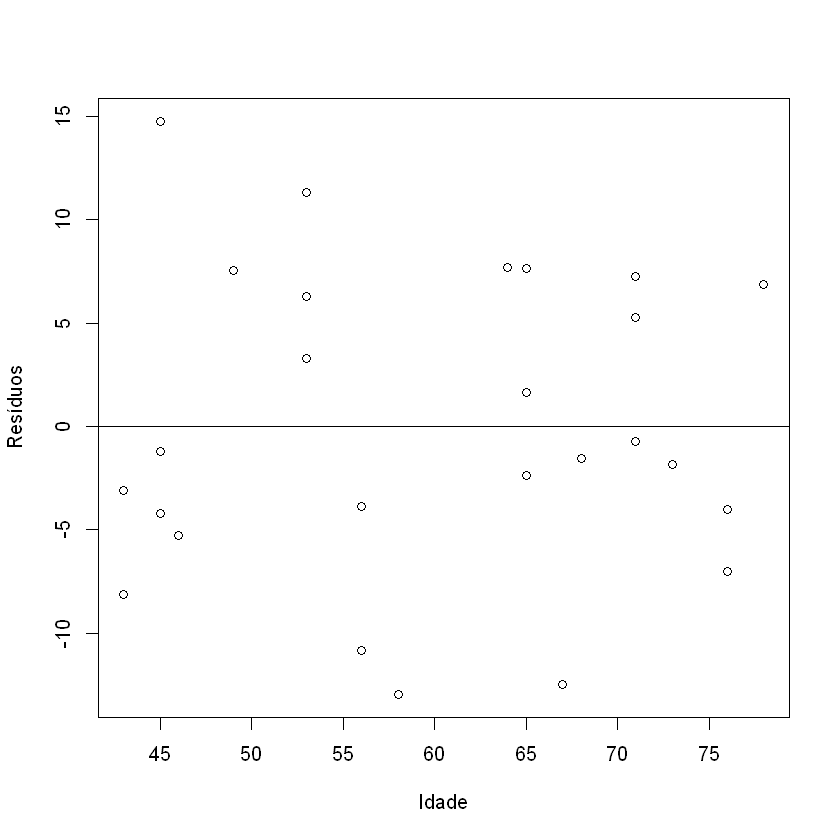

In [9]:
#gráfico para detectar a correlaçã dos erros 
plot(idade,residuals(reg),xlab="Idade",ylab="Resíduos")
abline(h=0)

O gráfico acima não apresenta correlação nos resíduos. O próximo gráfico irá nos mostrar a normalidade dos resíduos, no entanto a mesma resposta poderia ser obtida com um teste de normalidade dos resíduos.

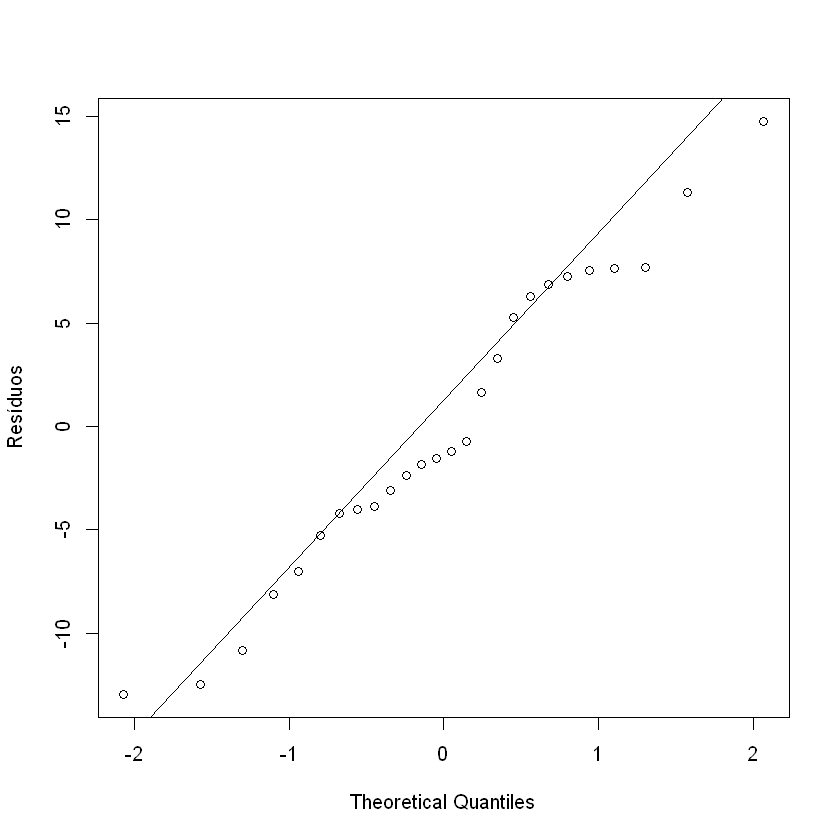

In [10]:
#normalidade dos resíduos
qqnorm(residuals(reg),ylab="Resíduos",main="")
qqline(residuals(reg))

O gráfico acima apresenta os dados seguindo uma distribuição normal. O teste de normalidade é apresentado para confirmar o resultado do gráfico. O teste de normalidade dos resíduos é determinado pelo comando $shapiro.test()$:

In [11]:
#Teste de normalidade nos resíduos
shapiro.test(residuals(reg))


	Shapiro-Wilk normality test

data:  residuals(reg)
W = 0.96767, p-value = 0.564


A hipótese nula afirma que os dados possuem uma distribuição normal, portanto com um p-valor = 0,564 não possuímos evidencias amostrais suficientes para rejeitarmos a hipótese nula, ou seja, os resíduos seguem uma distribuição normal. 